In [1]:
import numpy as np
import pandas
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

In [2]:
emotions = ['happy', 'sad', 'angry', 'chill', 'dreamy', 'lovey-dovey', 'epic', 'anxious', 'pump-up', 'sexy']

client_id = '2d0aef4304064e67bdce269495c514ba'
client_secret = 'b0b2829b32cd4963a5de4c35528faf1d'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

songs = []

for e in emotions:

    search_query = e
    result = sp.search(search_query, type='playlist')
    print(e + '\n')

    for i in result['playlists']['items']:

        playlist_id = i['id']
        tracks = sp.playlist_items(playlist_id)

        for j in tracks['items']:
            if (j['track'] != None):
                track_id = j['track']['id']
                if (track_id != None and track_id != ''):
                    #details
                    uri = 'spotify:track:' + track_id
                    features = sp.audio_features(uri)
                    if (features[0] != None):
                        songs.append([e, track_id, features[0]['danceability'], features[0]['energy'], features[0]['key'], features[0]['loudness'], features[0]['mode'], features[0]['speechiness'], features[0]['acousticness'], features[0]['instrumentalness'], features[0]['valence'], features[0]['tempo']])

happy

sad

angry

chill

dreamy

lovey-dovey

epic

anxious

pump-up

sexy



In [3]:
array = np.array(songs)
df = pandas.DataFrame(array, columns=['emotion', 'song', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
df.describe()

,emotion,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,8298,8298,8298,8298,8298,8298,8298,8298,8298,8298,8298,8298
unique,10,7511,870,1195,12,5785,2,1094,2406,2495,1261,6486
top,happy,7lPN2DXiMsVn7XUKtOW1CS,0.629,0.824,0,-8.761,1,0.0322,0.128,0,0.291,99.991
freq,950,7,35,23,989,9,5243,31,19,3067,27,8


In [4]:
df.drop_duplicates(subset='song', inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,emotion,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,7511,7511,7511,7511,7511,7511,7511,7511,7511,7511,7511,7511
unique,10,7511,870,1195,12,5785,2,1094,2406,2495,1261,6486
top,dreamy,1zVhMuH7agsRe6XkljIY4U,0.629,0.537,0,-5.122,1,0.0337,0.963,0,0.352,120.002
freq,887,1,28,19,901,7,4739,29,17,2638,20,7


In [5]:
df.head(len(df))

,emotion,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,happy,30oRPNefnSnXEBL2aOifIS,0.674,0.862,5,-6.431,0,0.0344,0.00123,0.0643,0.806,123.004
1,happy,1Rmxhk9QkgjJAPifwkA4uM,0.619,0.71,4,-3.058,1,0.0403,0.136,0,0.359,124.106
2,happy,3dp7Dng3aEk9t80jQ063de,0.659,0.788,7,-7.463,1,0.0471,0.0167,0.00818,0.78,121.016
3,happy,75rGONmoi48LLYBFaGiYsv,0.735,0.71,11,-10.222,1,0.0766,0.00851,0.762,0.507,123.962
4,happy,1LLm4XXXV0FErcxPDw9Vt7,0.679,0.73,4,-4.727,1,0.0498,0.0967,7.44e-06,0.587,123.96
...,...,...,...,...,...,...,...,...,...,...,...,...
7506,sexy,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.125,0.0589,6e-05,0.35,91.03
7507,sexy,6HlE9t71z9DjGi7KqSyEpA,0.711,0.592,4,-7.136,0,0.23,0.758,0,0.535,124.749
7508,sexy,2Sh4sAOfnSHEVKFyysxzat,0.694,0.81,11,-3.556,0,0.0661,0.122,0,0.824,137.968
7509,sexy,6rPO02ozF3bM7NnOV4h6s2,0.653,0.816,2,-4.353,1,0.167,0.228,0,0.816,178.085


In [9]:
counter = [0 for i in emotions]

for j in range(len(df)):
    e = df.iloc[j]['emotion']
    for k in range(len(emotions)):
        if emotions[k] == e:
            counter[k] += 1

In [10]:
counter

[884, 739, 814, 869, 887, 691, 823, 495, 698, 611]

In [21]:
df2 = df[['emotion', 'song', 'energy', 'valence']]
df2.head(1000)

,emotion,song,energy,valence
0,happy,30oRPNefnSnXEBL2aOifIS,0.862,0.806
1,happy,1Rmxhk9QkgjJAPifwkA4uM,0.71,0.359
2,happy,3dp7Dng3aEk9t80jQ063de,0.788,0.78
3,happy,75rGONmoi48LLYBFaGiYsv,0.71,0.507
4,happy,1LLm4XXXV0FErcxPDw9Vt7,0.73,0.587
...,...,...,...,...
995,sad,0Z5ok0QLLttAKsujOZYOXf,0.47,0.325
996,sad,3AJwUDP919kvQ9QcozQPxg,0.661,0.285
997,sad,3X3mfRMRaPJRiIMDMQtSkd,0.423,0.325
998,sad,2dHAkrR6F78HeEgogDThyd,0.138,0.529


0 : 884 

884 

884 : 739 

739 

1623 : 814 

814 

2437 : 869 

869 

3306 : 887 

887 

4193 : 691 

691 

4884 : 823 

823 

5707 : 495 

495 

6202 : 698 

698 

6900 : 611 

611 



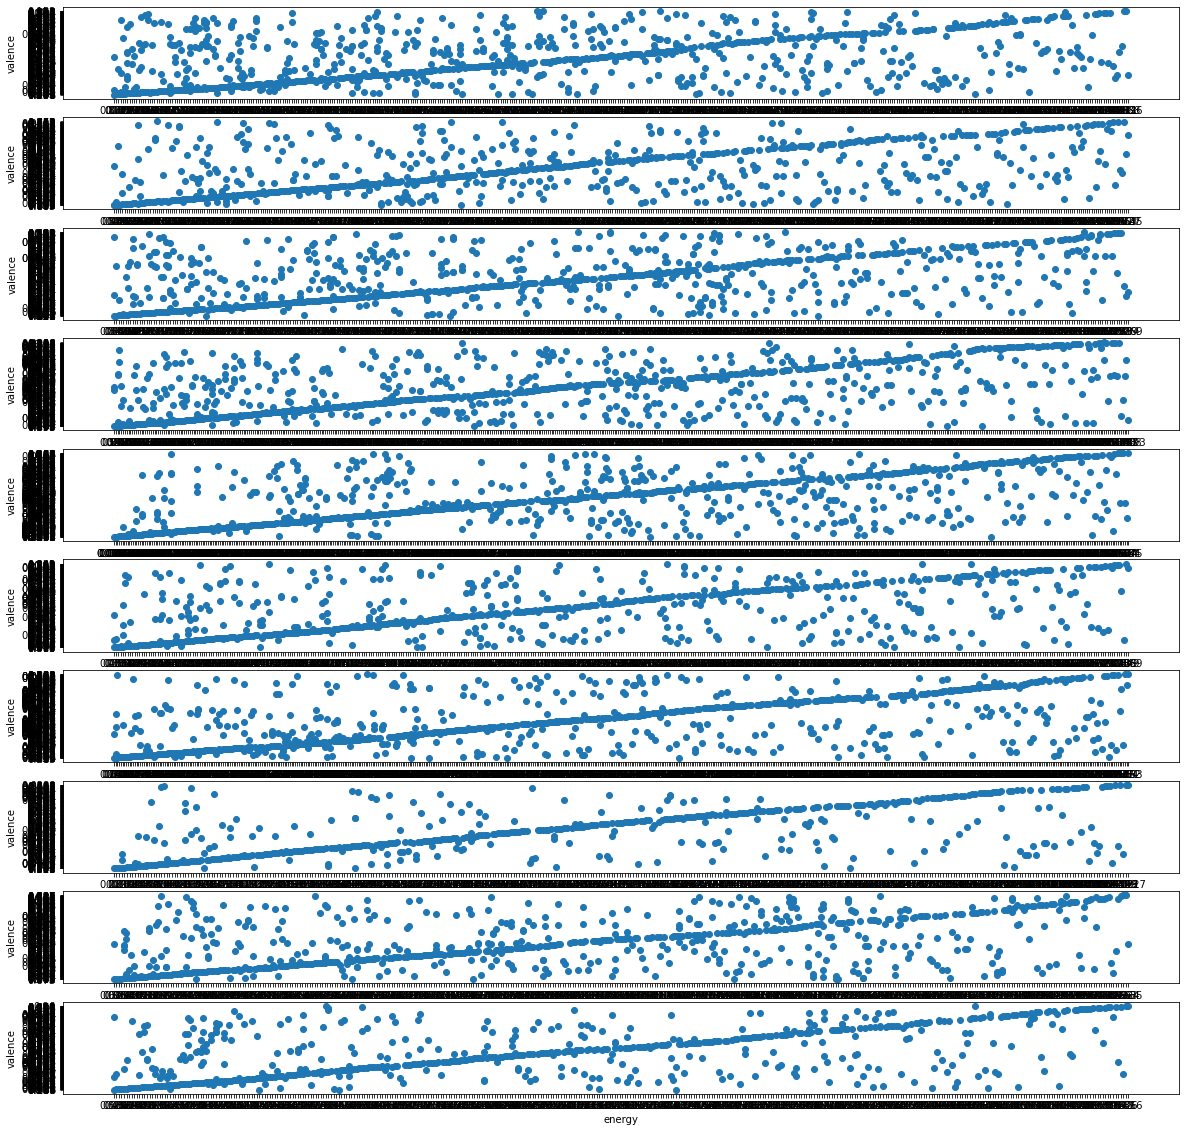

In [24]:
import matplotlib.pyplot as plt

curpos = 0
cc = 1

plt.figure(1, figsize=(30,30))

for c in counter:
    df3 = df2[curpos:curpos + c]
    print(curpos, ':', c, '\n')
    curpos += c
    print(c, '\n')
    plt.subplot(10, 1, cc)
    plt.scatter(df3['energy'], df3['valence'])
    plt.xlabel('energy')
    plt.ylabel('valence')
    cc += 1
plt.show()